# K近邻分类

## 导入数据集

In [10]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [2]:
# 导入iris数据集
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 测试模型

In [13]:
# 分割数据集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
# 训练模型
clf = neighbors.KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
clf.fit(X_train, y_train)
print(clf.predict(X_test))
print(clf.score(X_test, y_test))
print(clf.score(X_test, y_test))

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
0.9777777777777777
0.9777777777777777


## 网格搜索，确定最优参数

In [23]:
# 设置参数
paras = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25],
         'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
         'p': [1, 2]}

# 网格搜索
from sklearn.model_selection import GridSearchCV
GS = GridSearchCV(neighbors.KNeighborsClassifier(), paras, cv=5)

GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25],
                         'p': [1, 2]})

In [24]:
GS.best_params_

{'leaf_size': 10, 'n_neighbors': 5, 'p': 2}

In [25]:
GS.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [26]:
GS.score(X_test, y_test)

0.9777777777777777

# 最近邻回归

## 产生数据

In [27]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
X

array([[0.093949  ],
       [0.10109199],
       [0.35518029],
       [0.4356465 ],
       [0.59137213],
       [0.71676644],
       [1.32277806],
       [1.91720759],
       [2.0733097 ],
       [2.118274  ],
       [2.18793606],
       [2.28075166],
       [2.30739681],
       [2.60924161],
       [2.6444746 ],
       [2.72441591],
       [2.74406752],
       [2.84022281],
       [2.84216974],
       [3.01381688],
       [3.06047861],
       [3.08466998],
       [3.08817749],
       [3.19960511],
       [3.22947057],
       [3.4091015 ],
       [3.57594683],
       [3.87116845],
       [3.89078375],
       [3.90264588],
       [3.95862519],
       [3.99579282],
       [4.16309923],
       [4.35006074],
       [4.458865  ],
       [4.62798319],
       [4.71874039],
       [4.72334459],
       [4.8183138 ],
       [4.89309171]])

In [28]:
T = np.linspace(0, 5, 500)[:, np.newaxis]
T

array([[0.        ],
       [0.01002004],
       [0.02004008],
       [0.03006012],
       [0.04008016],
       [0.0501002 ],
       [0.06012024],
       [0.07014028],
       [0.08016032],
       [0.09018036],
       [0.1002004 ],
       [0.11022044],
       [0.12024048],
       [0.13026052],
       [0.14028056],
       [0.1503006 ],
       [0.16032064],
       [0.17034068],
       [0.18036072],
       [0.19038076],
       [0.2004008 ],
       [0.21042084],
       [0.22044088],
       [0.23046092],
       [0.24048096],
       [0.250501  ],
       [0.26052104],
       [0.27054108],
       [0.28056112],
       [0.29058116],
       [0.3006012 ],
       [0.31062124],
       [0.32064128],
       [0.33066132],
       [0.34068136],
       [0.3507014 ],
       [0.36072144],
       [0.37074148],
       [0.38076152],
       [0.39078156],
       [0.4008016 ],
       [0.41082164],
       [0.42084168],
       [0.43086172],
       [0.44088176],
       [0.4509018 ],
       [0.46092184],
       [0.470

In [30]:
y = np.sin(X).ravel()
y

array([ 0.09381086,  0.10091989,  0.34775941,  0.4219966 ,  0.55750066,
        0.65695022,  0.96940081,  0.94059723,  0.87637482,  0.8538402 ,
        0.81553704,  0.75839099,  0.74075654,  0.50756044,  0.47689441,
        0.40518094,  0.38713765,  0.29682859,  0.29496884,  0.12742837,
        0.08102512,  0.05689193,  0.05338977, -0.05797992, -0.08776485,
       -0.26432971, -0.42082464, -0.66655347, -0.68104667, -0.68968448,
       -0.72911815, -0.75404581, -0.85289554, -0.93507411, -0.96803456,
       -0.99643995, -0.99997983, -0.99993999, -0.99439521, -0.98371764])

In [31]:
# 添加噪声
y[::5] += 1 * (0.5 - np.random.rand(8))

## 训练模型

In [33]:
clf = neighbors.KNeighborsRegressor(n_neighbors=5, p=2, metric='minkowski')
clf.fit(X, y)
y_ = clf.predict(X)
clf.score(X, y)

0.9639580074451758

## 绘图

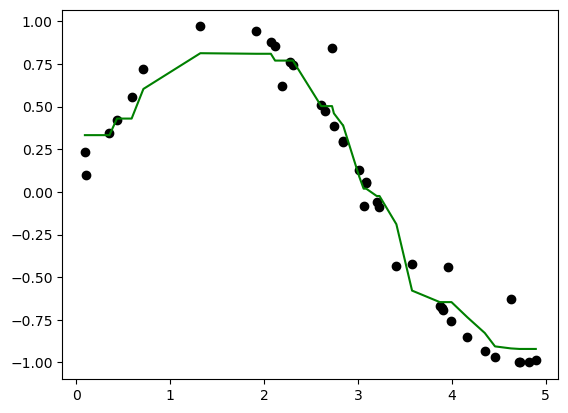

In [34]:
plt.figure()
plt.scatter(X, y, c='k', label='data')
plt.plot(X, y_, c='g', label='prediction')


In [35]:
clf = neighbors.KNeighborsRegressor(n_neighbors=3, p=2, metric='minkowski')
clf.fit(X, y)
y_ = clf.predict(X)
clf.score(X, y)

0.9759406105625699

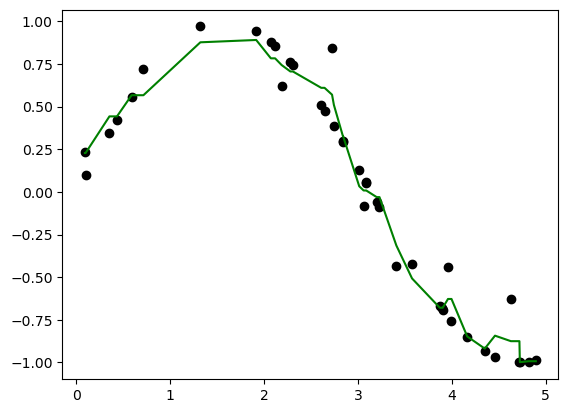

In [36]:
plt.figure()
plt.scatter(X, y, c='k', label='data')
plt.plot(X, y_, c='g', label='prediction')


## 网格搜索

In [40]:
# 设置参数
paras = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25],
            'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
            'p': [1, 2]}

# 网格搜索
from sklearn.model_selection import GridSearchCV
GS = GridSearchCV(neighbors.KNeighborsRegressor(), paras, cv=10)

GS.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25],
                         'p': [1, 2]})

In [41]:
GS.best_params_

{'leaf_size': 10, 'n_neighbors': 3, 'p': 1}

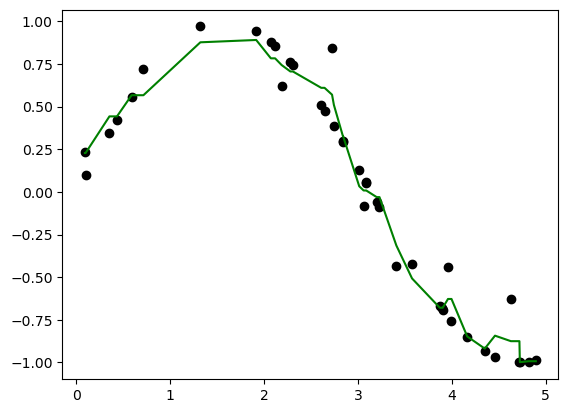

In [42]:
y_ = GS.predict(X)

plt.figure()
plt.scatter(X, y, c='k', label='data')
plt.plot(X, y_, c='g', label='prediction')